In [5]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\Users\jarvi\.vscode\Python\TNSIF_AIML_DBIT\gold_price_data.csv")
print(df.shape)

(5215, 7)
<bound method NDFrame.head of             date        open        high         low       close   adj_close  \
0     2004-11-18   44.380001   44.380001   44.490002   44.070000   44.430000   
1     2004-11-19   44.779999   44.779999   44.919998   44.470001   44.490002   
2     2004-11-22   44.950001   44.950001   44.970001   44.740002   44.750000   
3     2004-11-23   44.750000   44.750000   44.919998   44.720001   44.880001   
4     2004-11-24   45.049999   45.049999   45.049999   44.790001   44.930000   
...          ...         ...         ...         ...         ...         ...   
5210  2025-08-06  310.500000  310.500000  311.239990  309.839996  310.320007   
5211  2025-08-07  313.119995  313.119995  313.140015  310.700012  311.720001   
5212  2025-08-08  313.049988  313.049988  313.529999  311.000000  312.350006   
5213  2025-08-11  308.549988  308.549988  309.660004  307.630005  308.619995   
5214  2025-08-12  308.269989  308.269989  309.309998  306.709991  308.220001   


In [6]:
df.head()


,date,open,high,low,close,adj_close,volume
0,2004-11-18,44.380001,44.380001,44.490002,44.070000,44.430000,5992000
1,2004-11-19,44.779999,44.779999,44.919998,44.470001,44.490002,11655300
2,2004-11-22,44.950001,44.950001,44.970001,44.740002,44.750000,11996000
3,2004-11-23,44.750000,44.750000,44.919998,44.720001,44.880001,3169200
4,2004-11-24,45.049999,45.049999,45.049999,44.790001,44.930000,6105100


In [7]:
df.isnull()

,date,open,high,low,close,adj_close,volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
5210,False,False,False,False,False,False,False
5211,False,False,False,False,False,False,False
5212,False,False,False,False,False,False,False
5213,False,False,False,False,False,False,False


In [10]:
df.dropna()

,date,open,high,low,close,adj_close,volume
0,2004-11-18,44.380001,44.380001,44.490002,44.070000,44.430000,5992000
1,2004-11-19,44.779999,44.779999,44.919998,44.470001,44.490002,11655300
2,2004-11-22,44.950001,44.950001,44.970001,44.740002,44.750000,11996000
3,2004-11-23,44.750000,44.750000,44.919998,44.720001,44.880001,3169200
4,2004-11-24,45.049999,45.049999,45.049999,44.790001,44.930000,6105100
...,...,...,...,...,...,...,...
5210,2025-08-06,310.500000,310.500000,311.239990,309.839996,310.320007,7418200
5211,2025-08-07,313.119995,313.119995,313.140015,310.700012,311.720001,10891500
5212,2025-08-08,313.049988,313.049988,313.529999,311.000000,312.350006,19886800
5213,2025-08-11,308.549988,308.549988,309.660004,307.630005,308.619995,10326700


In [11]:
df.duplicated().any()



np.False_

In [12]:
df.describe()

,open,high,low,close,adj_close,volume
count,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5.215000e+03
mean,131.940968,131.940968,132.570993,131.256556,131.939183,9.423568e+06
std,51.291094,51.291094,51.459284,51.073175,51.282084,6.645282e+06
min,41.259998,41.259998,41.360001,41.020000,41.029999,3.193000e+05
25%,104.730000,104.730000,105.355000,104.160000,104.754997,5.305150e+06
50%,124.400002,124.400002,124.870003,123.980003,124.459999,7.818800e+06
75%,164.779999,164.779999,165.489998,164.004997,164.544998,1.154915e+07
max,316.290009,316.290009,317.630005,315.040009,317.489990,9.380420e+07


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

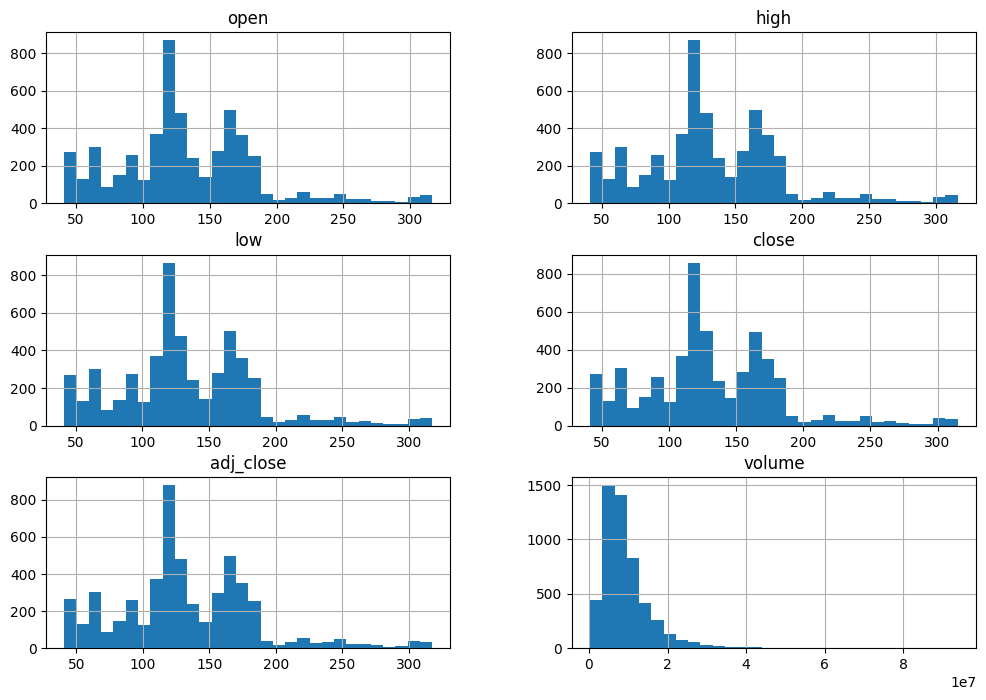

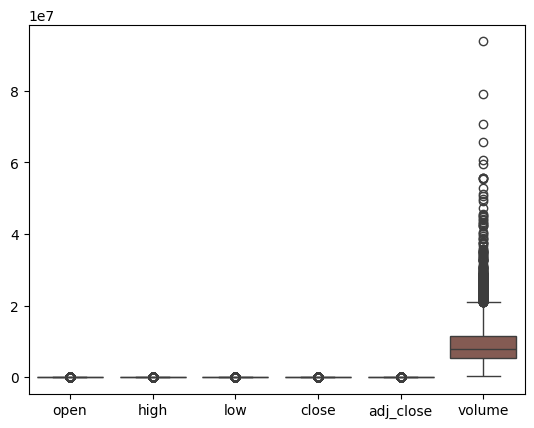

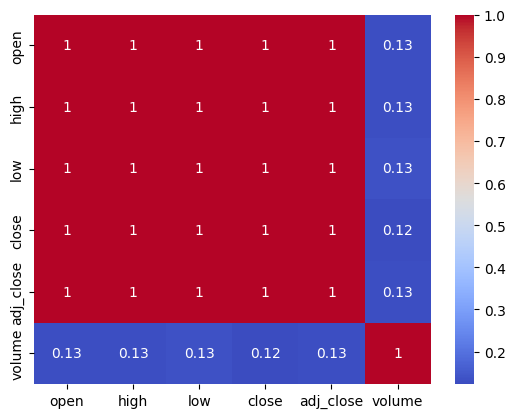

In [15]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
df.hist(bins=30, figsize=(12, 8))   
plt.show()

sns.boxplot(data=df)               
plt.show()

sns.heatmap(numeric_df .corr(), annot=True, cmap="coolwarm") 
plt.show()

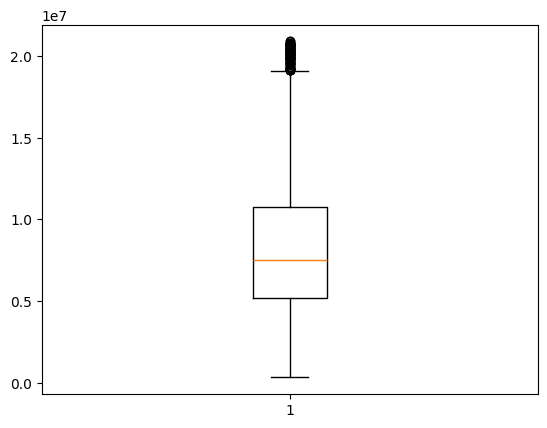

In [18]:
# Remove outliers from volume column
Q1 = df["volume"].quantile(0.25)
Q3 = df["volume"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df["volume"] >= lower_bound) & (df["volume"] <= upper_bound)]
plt.boxplot(df_no_outliers["volume"])
plt.show()

In [43]:

X = df[['open', 'high', 'low', 'volume']]


y = df['close']

print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())


Features (X):
        open       high        low    volume
0  44.380001  44.380001  44.490002   5992000
1  44.779999  44.779999  44.919998  11655300
2  44.950001  44.950001  44.970001  11996000
3  44.750000  44.750000  44.919998   3169200
4  45.049999  45.049999  45.049999   6105100

Target (y):
0    44.070000
1    44.470001
2    44.740002
3    44.720001
4    44.790001
Name: close, dtype: float64


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Squared Error (MSE): 0.2584577487369329
Root Mean Squared Error (RMSE): 0.5083874002539135
R² Score: 0.9999031349631181


In [46]:
print(X_train.shape, y_train.shape)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

(4172, 4) (4172,)
Intercept: 0.21487234165505242
Coefficients: [ 2.88192092e-01  2.88192092e-01  4.18849282e-01 -5.64523423e-08]


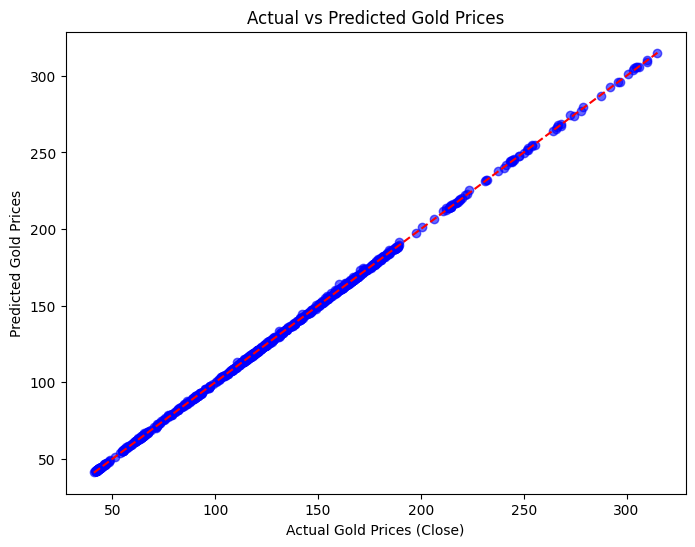

In [54]:



plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.xlabel("Actual Gold Prices (Close)")
plt.ylabel("Predicted Gold Prices")
plt.title("Actual vs Predicted Gold Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--")
plt.show()

In [55]:
oeff_df = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print("\nModel Coefficients:")
print(coeff_df)

print("\nIntercept:", model.intercept_)


Model Coefficients:
         Coefficient
open    2.881921e-01
high    2.881921e-01
low     4.188493e-01
volume -5.645234e-08

Intercept: 0.21487234165505242
